# ALGORITMOS PARA EL VINO

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels


# FUNCIONES

## funcion para la matriz de confusion

In [2]:
def plot(y_val, y_pred, title):
    labels = unique_labels(y_train)
    column = [f'Predi {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_val, y_pred),
                         columns=column,index=indices)
    
    heatmap = sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
    heatmap.set_title(title)
    return heatmap

## Funcion para calcular los resultados de los modelos

In [3]:
def resultadosModelo(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred, zero_division=1)
    print("Precisión:", accuracy)
    print("Informe de Clasificación:\n")
    print(classification_rep)

In [4]:
datos = pd.read_csv("winequalityN.csv") 

In [5]:
datos

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
columnas_con_faltantes = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

datos = datos.dropna(subset=columnas_con_faltantes)

<Axes: title={'center': 'Cantidad de datos de la calidad del vino'}, xlabel='quality'>

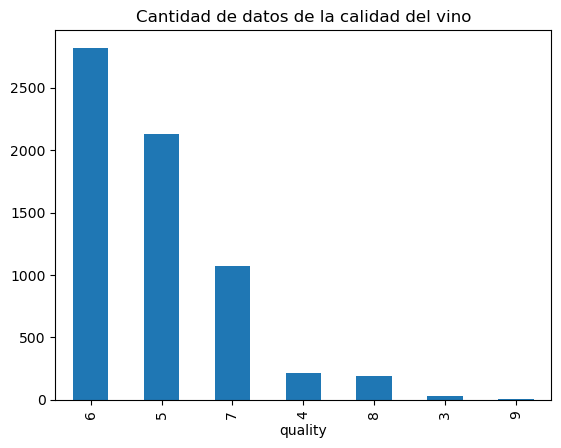

In [7]:
datos["quality"].value_counts().plot(kind='bar', title='Cantidad de datos de la calidad del vino')

In [8]:
datosn=datos[datos['quality'] != 9]

In [9]:
datosn=datosn[datosn['quality'] != 3]

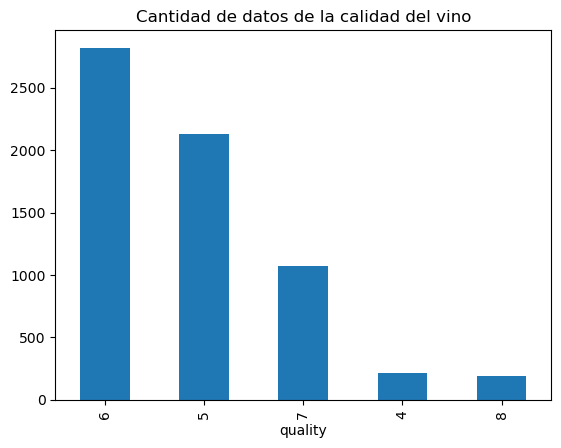

In [10]:
datosn["quality"].value_counts().plot(kind='bar', title='Cantidad de datos de la calidad del vino')
plt.savefig("cantidad de datos.eps",format='eps')

In [11]:
datosn.loc[datosn['type'] == 'red', 'type'] = 0
datosn.loc[datosn['type'] == 'white', 'type'] = 1

In [124]:
datosn

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


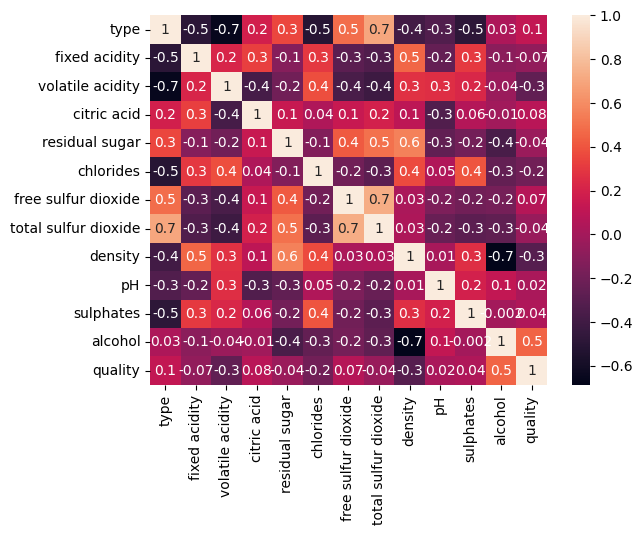

In [125]:
sns.heatmap(datosn.corr(),annot=True,fmt=".0g")
plt.savefig("correlacion.eps",format='eps')

In [12]:
X = datosn.drop('quality', axis=1)
y = datosn['quality']

In [13]:
mean = X.mean(axis=0)
std = X.std(axis=0)
data_normalized = (X - mean) / std

In [14]:
data_normalized

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.571557,-0.165718,-0.421997,0.283321,3.205832,-0.314764,0.838127,0.967272,2.101306,-1.359652,-0.545615,-1.419291
1,0.571557,-0.706192,-0.237969,0.145514,-0.808395,-0.2001,-0.950525,0.2908,-0.231743,0.510753,-0.277223,-0.832395
2,0.571557,0.683598,-0.360654,0.558935,0.3055,-0.171434,-0.02735,-0.332267,0.134879,0.261366,-0.612713,-0.329341
3,0.571557,-0.011297,-0.667367,0.007707,0.641771,0.057894,0.953523,1.252102,0.301526,-0.175062,-0.881105,-0.497025
4,0.571557,-0.011297,-0.667367,0.007707,0.641771,0.057894,0.953523,1.252102,0.301526,-0.175062,-0.881105,-0.497025
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,-1.749334,-0.320139,1.724991,-1.645975,-0.745345,0.344554,-0.142747,-1.382578,0.604822,1.258915,1.937011,-0.832395
6492,-1.749334,-0.783403,1.602306,-1.645975,-0.724328,0.975207,0.088047,-1.275767,0.068221,1.445956,0.326659,0.006029
6494,-1.749334,-0.706192,1.050223,-1.301458,-0.661277,0.573883,-0.085049,-1.346975,0.348187,1.258915,1.467325,0.42524
6495,-1.749334,-1.015034,1.878347,-1.370362,-0.724328,0.545217,0.088047,-1.275767,0.258198,2.194118,1.198933,-0.245498


In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\andre\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

### separacion de datos, entrenamiento (70%) y validacion (30%)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(data_normalized ,y, test_size=0.3, random_state=42)

In [ ]:


# Supongamos que 'X' es tu conjunto de características y 'y' es tu conjunto de etiquetas

# Divide los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplica SMOTE solo al conjunto de entrenamiento para evitar fuga de información
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Combina los datos originales con los generados sintéticamente
X_extended = np.vstack((X, X_resampled))
y_extended = np.concatenate((y, y_resampled))

# Mezcla los datos para evitar patrones
X_extended, y_extended = shuffle(X_extended, y_extended)


# Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}
# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_prueba = best_model.predict(X_val)
y_test_prueba = best_model.predict(X_train)
best_params = best_model.get_params
best_params

c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constra

<bound method BaseEstimator.get_params of RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=42)>

In [133]:
rf_classifier = RandomForestClassifier(n_estimators=100,max_features='sqrt',random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_val)

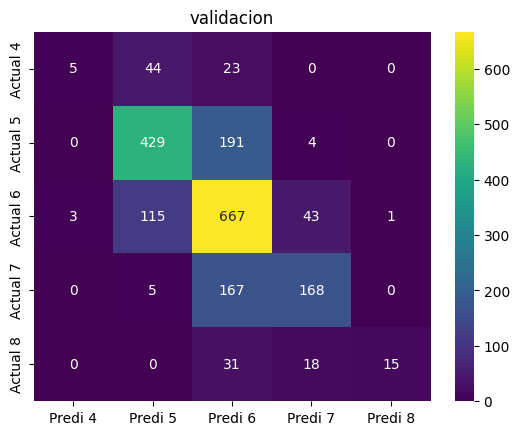

In [188]:
plot(y_val,y_pred_prueba,"validacion")
plt.savefig("validacionRF.eps",format='eps')

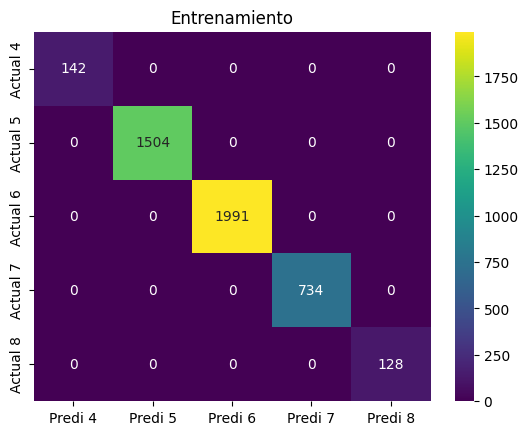

In [135]:
plot(y_train,y_test_prueba,"Entrenamiento")
plt.savefig("EntrenamientoRF.eps",format='eps')

In [136]:
resultadosModelo(y_val, y_pred_prueba)

Precisión: 0.6656298600311042
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.62      0.07      0.12        72
           5       0.72      0.69      0.71       624
           6       0.62      0.80      0.70       829
           7       0.72      0.49      0.59       340
           8       0.94      0.23      0.38        64

    accuracy                           0.67      1929
   macro avg       0.73      0.46      0.50      1929
weighted avg       0.68      0.67      0.65      1929



In [137]:
resultadosModelo(y_train, y_test_prueba)

Precisión: 1.0
Informe de Clasificación:

              precision    recall  f1-score   support

           4       1.00      1.00      1.00       142
           5       1.00      1.00      1.00      1504
           6       1.00      1.00      1.00      1991
           7       1.00      1.00      1.00       734
           8       1.00      1.00      1.00       128

    accuracy                           1.00      4499
   macro avg       1.00      1.00      1.00      4499
weighted avg       1.00      1.00      1.00      4499



# K-NN

In [138]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1,leaf_size=80)
neigh.fit(X_train, y_train)
y_pred2 = neigh.predict(X_val)

In [198]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size':[10,20,40,60,80,100,120]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba2 = best_model.predict(X_val)
y_test_prueba2 = best_model.predict(X_train)
best_params = grid_search.best_params_
best_params

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'distance'}

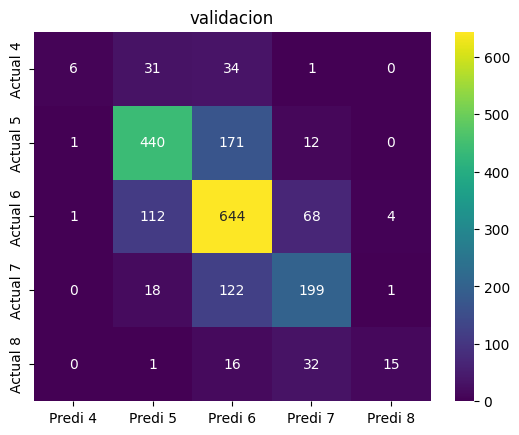

In [190]:
plot(y_val,y_pred_prueba2,"validacion")
plt.savefig("validacionKm.eps",format='eps')

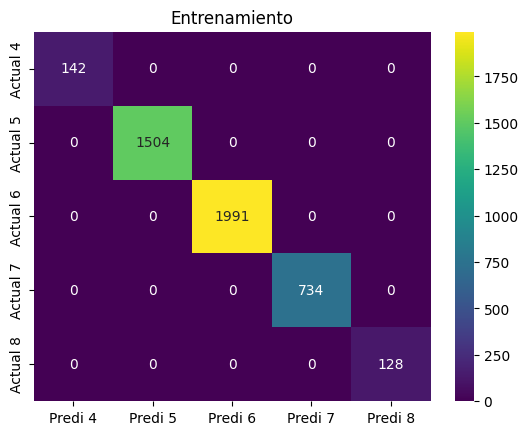

In [191]:
plot(y_train,y_test_prueba2,"Entrenamiento")
plt.savefig("EntrenamientoKm.eps",format='eps')

In [199]:
resultadosModelo(y_val, y_pred_prueba2)

Precisión: 0.6677034733022291
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.83      0.07      0.13        72
           5       0.72      0.70      0.71       624
           6       0.65      0.77      0.70       829
           7       0.62      0.56      0.59       340
           8       0.71      0.23      0.35        64

    accuracy                           0.67      1929
   macro avg       0.71      0.47      0.50      1929
weighted avg       0.68      0.67      0.65      1929



In [200]:
resultadosModelo(y_train, y_test_prueba2)

Precisión: 1.0
Informe de Clasificación:

              precision    recall  f1-score   support

           4       1.00      1.00      1.00       142
           5       1.00      1.00      1.00      1504
           6       1.00      1.00      1.00      1991
           7       1.00      1.00      1.00       734
           8       1.00      1.00      1.00       128

    accuracy                           1.00      4499
   macro avg       1.00      1.00      1.00      4499
weighted avg       1.00      1.00      1.00      4499



# Arboles de decision

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred3 = classifier.predict(X_val)

In [146]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Create the grid search object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba3 = best_model.predict(X_val)
y_test_prueba3 = best_model.predict(X_train)
best_params = grid_search.best_params_

c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_co

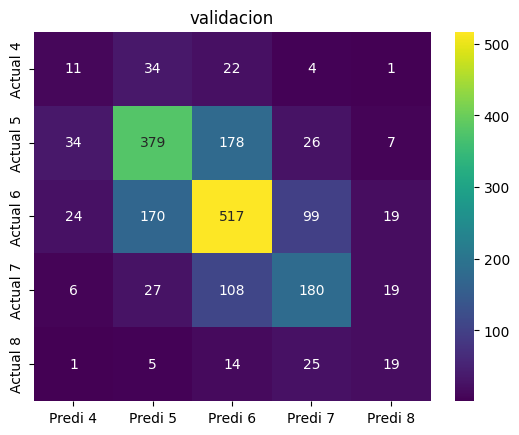

In [147]:
plot(y_val,y_pred_prueba3,"validacion")
plt.savefig("ArbolesDecisionVal.eps",format='eps')

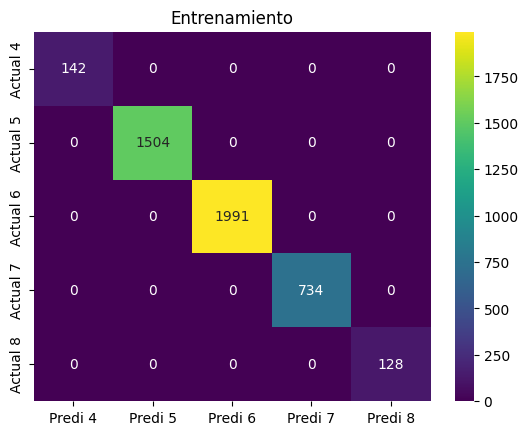

In [148]:
plot(y_train,y_test_prueba3,"Entrenamiento")
plt.savefig("ArbolesDecisionEnt.eps",format='eps')

In [149]:
resultadosModelo(y_val, y_pred_prueba3)

Precisión: 0.5733540694660446
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.14      0.15      0.15        72
           5       0.62      0.61      0.61       624
           6       0.62      0.62      0.62       829
           7       0.54      0.53      0.53       340
           8       0.29      0.30      0.29        64

    accuracy                           0.57      1929
   macro avg       0.44      0.44      0.44      1929
weighted avg       0.57      0.57      0.57      1929



In [150]:
resultadosModelo(y_train, y_test_prueba3)

Precisión: 1.0
Informe de Clasificación:

              precision    recall  f1-score   support

           4       1.00      1.00      1.00       142
           5       1.00      1.00      1.00      1504
           6       1.00      1.00      1.00      1991
           7       1.00      1.00      1.00       734
           8       1.00      1.00      1.00       128

    accuracy                           1.00      4499
   macro avg       1.00      1.00      1.00      4499
weighted avg       1.00      1.00      1.00      4499



# SVC (Support Vector Classifier)

In [151]:
from sklearn.svm import SVC

In [152]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred4 = svm_classifier.predict(X_val)

In [153]:
param_grid = {
    'C': [0.001, 0.01,0.1, 1, 10],  # Parámetro de regularización
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipo de kernel
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [0.001,0.01,0.1,1,10]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=SVC(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba4 = best_model.predict(X_val)
y_test_prueba4 = best_model.predict(X_train)
best_params = grid_search.best_params_

c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1200 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_con

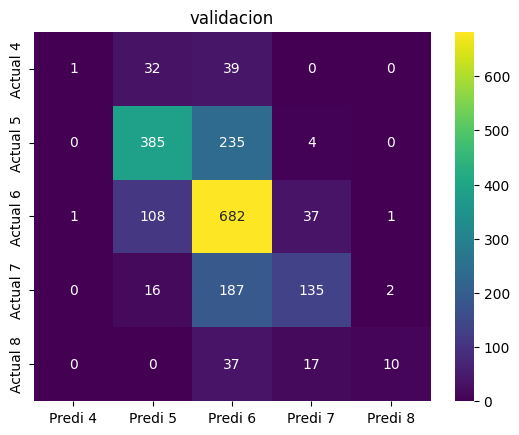

In [154]:
plot(y_val,y_pred_prueba4,"validacion")
plt.savefig("SVCVal.eps",format='eps')

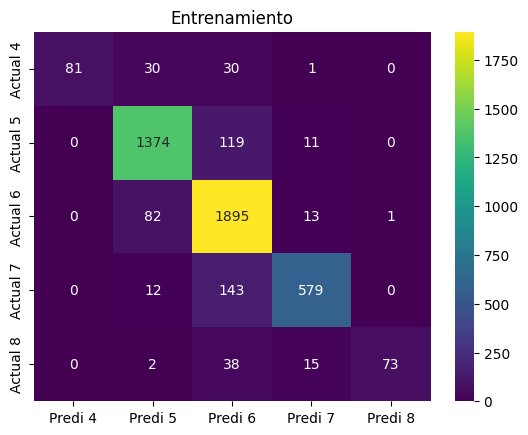

In [155]:
plot(y_train,y_test_prueba4,"Entrenamiento")
plt.savefig("SVCentrenamiento.eps",format='eps')

In [156]:
resultadosModelo(y_val, y_pred_prueba4)

Precisión: 0.6288232244686366
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.50      0.01      0.03        72
           5       0.71      0.62      0.66       624
           6       0.58      0.82      0.68       829
           7       0.70      0.40      0.51       340
           8       0.77      0.16      0.26        64

    accuracy                           0.63      1929
   macro avg       0.65      0.40      0.43      1929
weighted avg       0.65      0.63      0.60      1929



In [157]:
resultadosModelo(y_train, y_test_prueba4)

Precisión: 0.8895310068904201
Informe de Clasificación:

              precision    recall  f1-score   support

           4       1.00      0.57      0.73       142
           5       0.92      0.91      0.91      1504
           6       0.85      0.95      0.90      1991
           7       0.94      0.79      0.86       734
           8       0.99      0.57      0.72       128

    accuracy                           0.89      4499
   macro avg       0.94      0.76      0.82      4499
weighted avg       0.90      0.89      0.89      4499



# MLP (Multilayer perceptron)

In [158]:
from sklearn.neural_network import MLPClassifier

In [159]:
mlp = MLPClassifier(hidden_layer_sizes=(120,240,120), max_iter=10000,activation='tanh')
mlp.fit(X_train, y_train)
y_pred5 = mlp.predict(X_val)
y_test5= mlp.predict(X_train)

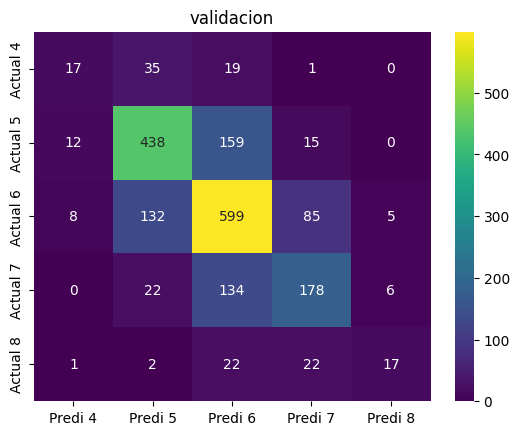

In [160]:
plot(y_val,y_pred5,"validacion")
plt.savefig("MLPVal.eps",format='eps')

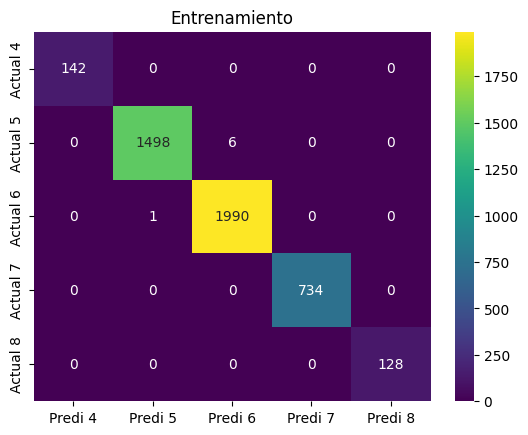

In [161]:
plot(y_train,y_test5,"Entrenamiento")
plt.savefig("MLPentrena.eps",format='eps')

In [162]:
resultadosModelo(y_val, y_pred5)

Precisión: 0.647485743908761
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.45      0.24      0.31        72
           5       0.70      0.70      0.70       624
           6       0.64      0.72      0.68       829
           7       0.59      0.52      0.56       340
           8       0.61      0.27      0.37        64

    accuracy                           0.65      1929
   macro avg       0.60      0.49      0.52      1929
weighted avg       0.64      0.65      0.64      1929



In [163]:
resultadosModelo(y_train, y_test5)

Precisión: 0.9984440986885975
Informe de Clasificación:

              precision    recall  f1-score   support

           4       1.00      1.00      1.00       142
           5       1.00      1.00      1.00      1504
           6       1.00      1.00      1.00      1991
           7       1.00      1.00      1.00       734
           8       1.00      1.00      1.00       128

    accuracy                           1.00      4499
   macro avg       1.00      1.00      1.00      4499
weighted avg       1.00      1.00      1.00      4499



# TensorFlow

In [170]:
import tensorflow as tf
from tensorflow import keras

y_train_array = y_train.values
y_val_array = y_val.values
y_train_array = y_train_array.astype(int)
y_val_array = y_val_array.astype(int)
y_train_array = y_train_array - 4
y_val_array = y_val_array - 4
# Convert to one-hot encoding
y_train2 = keras.utils.to_categorical(y_train_array, num_classes=5)
y_train2=tf.convert_to_tensor(y_train2, dtype=tf.int64) 
y_val2 = keras.utils.to_categorical(y_val_array, num_classes=5)
y_val2=tf.convert_to_tensor(y_val2, dtype=tf.int64) 
X_train2=np.asarray(X_train).astype(int)
X_val2=np.asarray(X_val).astype(int)

In [176]:

model = tf.keras.models.Sequential([
  
  keras.layers.Dense(120, activation='selu', input_shape=(12,), kernel_regularizer=keras.regularizers.l2(0.001)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(240, activation='selu', kernel_regularizer=keras.regularizers.l2(0.001)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(120, activation='selu', kernel_regularizer=keras.regularizers.l2(0.001)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [177]:
history = model.fit(X_train2, y_train2, batch_size=32, epochs=1000, verbose=2, 
                    shuffle=True, validation_data=(X_val2, y_val2))


print(history.history.keys())

Epoch 1/1000
141/141 - 5s - loss: 1.9090 - accuracy: 0.4161 - val_loss: 1.5072 - val_accuracy: 0.4686 - 5s/epoch - 38ms/step
Epoch 2/1000
141/141 - 1s - loss: 1.6630 - accuracy: 0.4350 - val_loss: 1.4870 - val_accuracy: 0.4733 - 1s/epoch - 10ms/step
Epoch 3/1000
141/141 - 1s - loss: 1.5541 - accuracy: 0.4565 - val_loss: 1.4488 - val_accuracy: 0.4826 - 1s/epoch - 10ms/step
Epoch 4/1000
141/141 - 2s - loss: 1.4734 - accuracy: 0.4712 - val_loss: 1.4261 - val_accuracy: 0.4795 - 2s/epoch - 11ms/step
Epoch 5/1000
141/141 - 2s - loss: 1.4437 - accuracy: 0.4772 - val_loss: 1.4005 - val_accuracy: 0.4624 - 2s/epoch - 13ms/step
Epoch 6/1000
141/141 - 2s - loss: 1.4156 - accuracy: 0.4839 - val_loss: 1.3750 - val_accuracy: 0.4920 - 2s/epoch - 11ms/step
Epoch 7/1000
141/141 - 2s - loss: 1.3764 - accuracy: 0.4974 - val_loss: 1.3550 - val_accuracy: 0.4795 - 2s/epoch - 12ms/step
Epoch 8/1000
141/141 - 2s - loss: 1.3608 - accuracy: 0.5114 - val_loss: 1.3441 - val_accuracy: 0.4811 - 2s/epoch - 12ms/step


141/141 [==============================] - 1s 5ms/step


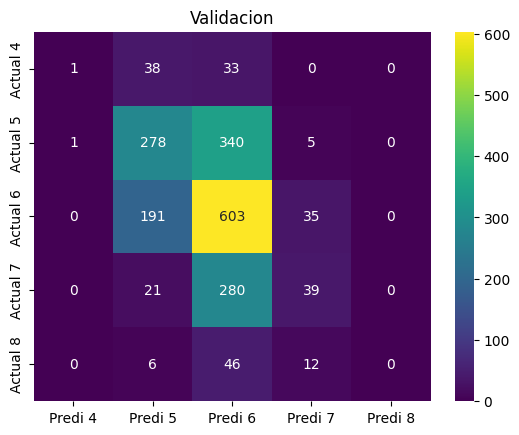

In [180]:
q = model.predict(X_val2)
q2 = model.predict(X_train2)
q = np.argmax(q, axis = 1)
q2 = np.argmax(q2, axis = 1)
plot(y_val_array,q,"Validacion")
plt.savefig("TensorVal.eps",format='eps')

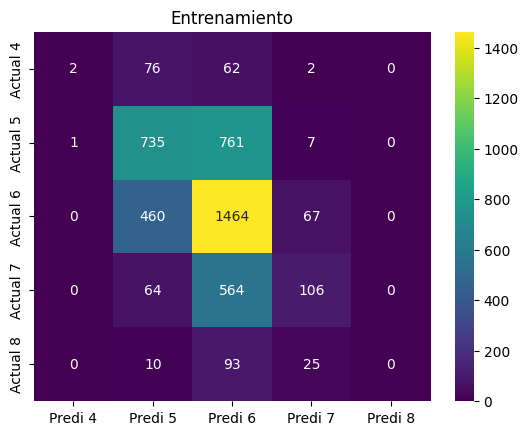

In [183]:
plot(y_train_array,q2,"Entrenamiento")
plt.savefig("TensorEnt.eps",format='eps')

In [185]:
resultadosModelo(y_val_array,q)

Precisión: 0.4774494556765163
Informe de Clasificación:

              precision    recall  f1-score   support

           0       0.50      0.01      0.03        72
           1       0.52      0.45      0.48       624
           2       0.46      0.73      0.57       829
           3       0.43      0.11      0.18       340
           4       1.00      0.00      0.00        64

    accuracy                           0.48      1929
   macro avg       0.58      0.26      0.25      1929
weighted avg       0.49      0.48      0.43      1929



In [186]:
resultadosModelo(y_train_array,q2)

Precisión: 0.5127806179150922
Informe de Clasificación:

              precision    recall  f1-score   support

           0       0.67      0.01      0.03       142
           1       0.55      0.49      0.52      1504
           2       0.50      0.74      0.59      1991
           3       0.51      0.14      0.23       734
           4       1.00      0.00      0.00       128

    accuracy                           0.51      4499
   macro avg       0.64      0.28      0.27      4499
weighted avg       0.54      0.51      0.47      4499

